100%|██████████| 9/9 [00:03<00:00,  2.69it/s]


Text(0.5, 1.0, 'The r2_score metric \n for KNN regression')

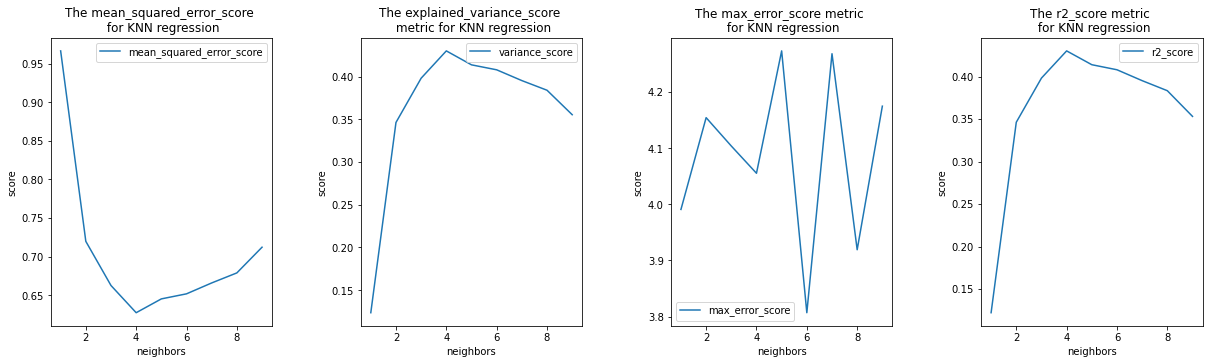

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, max_error, r2_score, mean_squared_error
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# load the data
train_data = pd.read_csv(r'C:\Users\s159132\PycharmProjects\Computational_Biology_Bachelor_End_Project\CHEMBL239_dataset_train.csv')
test_data = pd.read_csv(r'C:\Users\s159132\PycharmProjects\Computational_Biology_Bachelor_End_Project\CHEMBL239_dataset_test.csv')

# Get x and y values
y_train = train_data.loc[:, 'exp_mean']
y_test = test_data.loc[:, 'exp_mean']
X_train = train_data.loc[:, 'Bit 1' : 'Bit 1024']
X_test = test_data.loc[:, 'Bit 1' : 'Bit 1024']

mean_squared_error_score = []
variance_score = []
max_error_score = []
r2_value = []
neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for i in tqdm(range(1, 10)):
    # Create model
    knn = KNeighborsRegressor(n_neighbors=i, n_jobs=-1)

    # Fit the data
    knn.fit(X_train,y_train)

    # Make prediction
    y_pred_knn=knn.predict(X_test)

    # Compute regression metrics
    mean_squared_error_score.append(mean_squared_error(y_test, y_pred_knn))
    variance_score.append(explained_variance_score(y_test, y_pred_knn))
    max_error_score.append(max_error(y_test, y_pred_knn))
    r2_value.append(r2_score(y_test, y_pred_knn))

# Create figures
fig, axes = plt.subplots(1, 4,  figsize=(20, 5))

# Plot figures
axes[0].plot(neighbors, mean_squared_error_score, label = "mean_squared_error_score")
axes[1].plot(neighbors, variance_score, label = 'variance_score')
axes[2].plot(neighbors, max_error_score, label = 'max_error_score')
axes[3].plot(neighbors, r2_value, label = 'r2_score')

# Set axes for the explained_variance_score figure
for i in range(4):
    axes[i].set_ylabel('score')
    axes[i].set_xlabel('neighbors')
    axes[i].legend()

# To adjust the spacing between plots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# Set the titles for both figures
axes[0].set_title("The mean_squared_error_score \n for KNN regression")
axes[1].set_title("The explained_variance_score \n metric for KNN regression")
axes[2].set_title("The max_error_score metric \n for KNN regression")
axes[3].set_title("The r2_score metric \n for KNN regression")